<a href="https://colab.research.google.com/github/thanhnt19146391/study/blob/main/Back_points_detection_MAE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect your drive with your mail

In [45]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


Set source folder which contains x_data and y_data

In [46]:
X_DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/AI/Acupuncture_Back_Points_Detection/x_data.pickle'
Y_DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/AI/Acupuncture_Back_Points_Detection/Back_points.csv'

# Load data

Load x_data from drive

In [47]:
import glob
import pickle
import numpy as np
x_data = pickle.load(open(X_DATA_PATH, 'rb'))
x_data = np.array(x_data, dtype = 'float')
print('Shape of x data: ', x_data.shape)

Shape of x data:  (400, 180, 220)


Load y_data from drive

In [48]:
import pandas as pd
y_data = pd.read_csv(Y_DATA_PATH)
y_data.head(None)

,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,5_x,5_y,6_x,6_y,7_x,7_y,8_x,8_y,9_x,9_y,10_x,10_y
0,28,115,68,115,109,113,147,111,186,111,26,73,68,74,107,75,146,76,184,76
1,29,116,67,115,110,112,148,110,186,110,27,73,68,75,108,76,145,75,184,77
2,28,115,67,116,110,114,147,111,185,110,26,73,67,74,107,76,147,75,183,77
3,29,115,68,114,109,113,146,110,187,112,26,74,67,73,106,75,145,77,183,75
4,27,114,68,116,108,112,147,110,186,111,26,72,69,75,108,74,146,76,183,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,21,95,76,95,125,94,172,95,207,92,21,56,70,58,119,60,163,59,202,57
396,20,96,74,96,125,95,170,96,206,93,21,56,70,58,119,58,163,60,203,58
397,20,96,76,96,124,96,170,96,206,91,19,55,70,59,119,58,163,60,203,58
398,21,96,76,95,125,94,170,96,207,93,20,56,69,58,119,59,164,60,203,59


Show some images to check

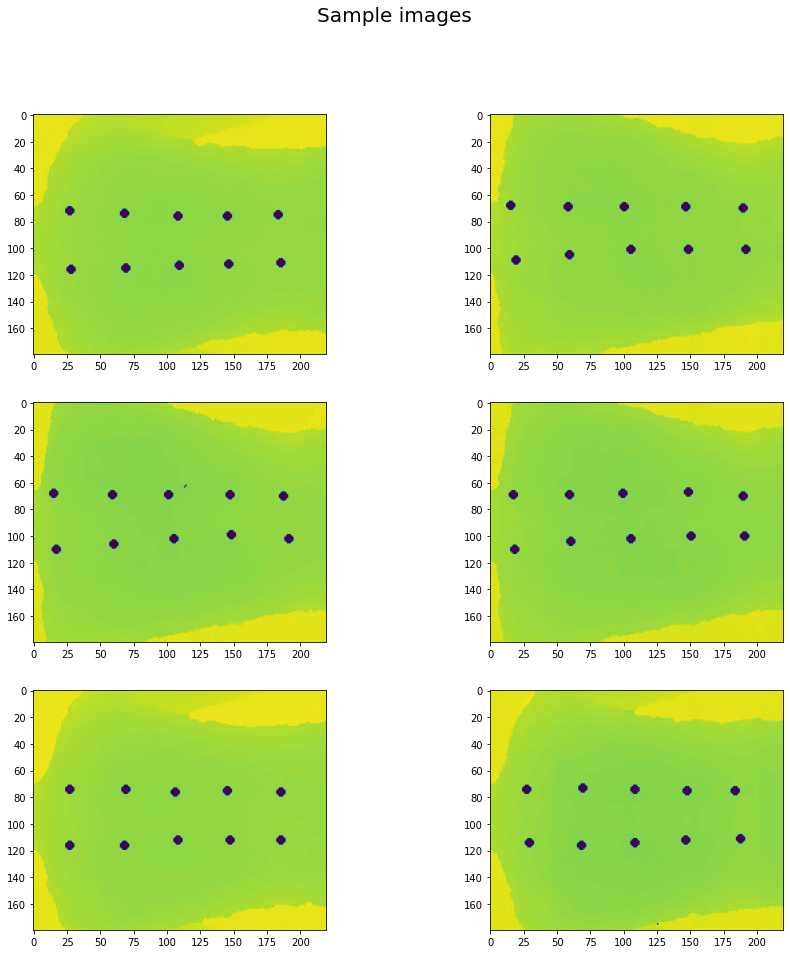

In [49]:
import matplotlib.pylab as plt
import pandas as pd
import random
import cv2

n = x_data.shape[0]
plt.figure(figsize = (15, 15))
plt.subplots_adjust(hspace = .2)
for i in range(6):
    plt.subplot(3, 2, i + 1)
    k = random.randint(0, n)
    img = x_data[k]
    points = list(y_data.iloc[k])
    points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
    for x, y in points:
        cv2.circle(img, (int(x), int(y)), 2, (0, 0, 0), 2)
    plt.imshow(img)

_ = plt.suptitle('Sample images', size = 20)

# Pretrain

Split data into train and test

In [50]:
from sklearn.model_selection import train_test_split
import numpy as np
height, width = x_data[0].shape
x_data = x_data.reshape(-1, height, width, 1)
input_shape = x_data.shape[1:4]
y_data = np.array(y_data, dtype = 'float')
num_class = y_data.shape[1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1)
print('Input shape: ', input_shape)
print('Number of output: ', num_class)
print('x train shape: ', x_train.shape)
print('y train shape: ', y_train.shape)
print('x test shape: ', x_test.shape)
print('y test shape: ', y_test.shape)

Input shape:  (180, 220, 1)
Number of output:  20
x train shape:  (360, 180, 220, 1)
y train shape:  (360, 20)
x test shape:  (40, 180, 220, 1)
y test shape:  (40, 20)


# Training


Built our model

In [52]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, LeakyReLU, Convolution2D, MaxPool2D
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape = input_shape))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
# # 1st block
# model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = input_shape, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2)))
# # model.add(Dropout(0.2))

# # 2nd block
# model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2, 2)))
# # model.add(Dropout(0.3))

# # 3rd block
# model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2, 2)))
# # model.add(Dropout(0.4))

# # 4th block
# model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2, 2)))
# # model.add(Dropout(0.5))

# # 5th block
# model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2, 2)))

# Dense
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
# model.add(Dense(num_class, activation='softmax'))
model.add(Dense(num_class))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 180, 220, 32)      288       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 180, 220, 32)      0         
                                                                 
 batch_normalization_52 (Bat  (None, 180, 220, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 180, 220, 32)      9216      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 180, 220, 32)      0         
                                                                 
 batch_normalization_53 (Bat  (None, 180, 220, 32)     128       
 chNormalization)                                     

Compiling our model

In [53]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
model.compile(
    optimizer = 'Adam',
    loss = "mean_squared_error",
    metrics = ['mae']
)

Train our model

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'val_mae', patience = 25)
hist = model.fit(x_train, y_train, epochs = 50, batch_size = 16, validation_split = 0.2).history

Epoch 1/50
18/18 [==============================] - 2s 91ms/step - loss: 1985.0662 - mae: 29.7171 - val_loss: 51989.0781 - val_mae: 193.3506
Epoch 2/50
18/18 [==============================] - 1s 72ms/step - loss: 169.1878 - mae: 9.1529 - val_loss: 57737.8281 - val_mae: 186.0408
Epoch 3/50
18/18 [==============================] - 1s 73ms/step - loss: 65.8334 - mae: 5.5744 - val_loss: 26794.7266 - val_mae: 127.6648
Epoch 4/50
18/18 [==============================] - 1s 72ms/step - loss: 33.8572 - mae: 4.1169 - val_loss: 11573.6670 - val_mae: 86.1604
Epoch 5/50
18/18 [==============================] - 1s 73ms/step - loss: 18.2201 - mae: 3.0868 - val_loss: 5591.4683 - val_mae: 60.6879
Epoch 6/50
18/18 [==============================] - 1s 72ms/step - loss: 13.5963 - mae: 2.7729 - val_loss: 2853.6125 - val_mae: 43.7594
Epoch 7/50
18/18 [==============================] - 1s 73ms/step - loss: 23.9735 - mae: 3.7993 - val_loss: 1241.7740 - val_mae: 28.7506
Epoch 8/50
18/18 [===================

Notification

In [21]:
from google.colab import output
output.eval_js('new Audio("https://www.soundjay.com/nature/sounds/rain-01.mp3").play()')

Measure accuracy and loss after training

In [55]:
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print('Final loss: {:.2f}'.format(final_loss))
print('Final accuracy: {:.2f}'.format(final_accuracy))

2/2 [==============================] - 0s 18ms/step - loss: 13.2580 - mae: 3.0307
Final loss: 13.26
Final accuracy: 3.03


Plot history

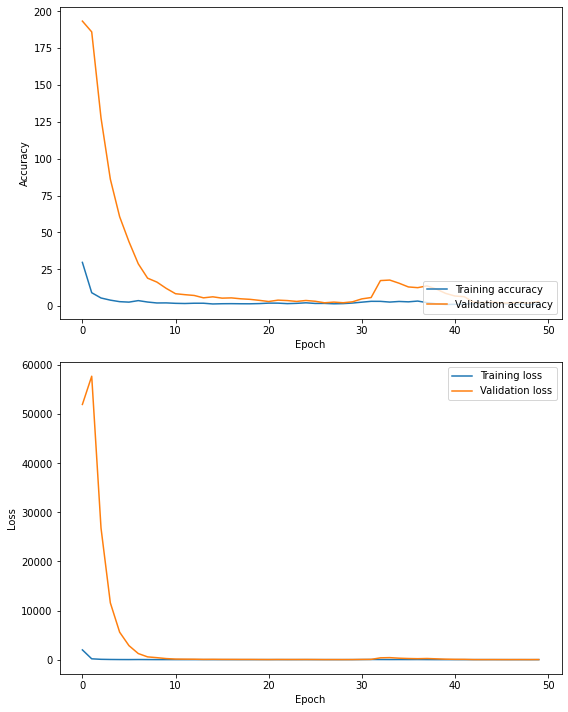

In [56]:
import pandas as pd
import matplotlib.pylab as plt
model_history = pd.DataFrame(hist)
# add epoch column
model_history['epoch'] = np.arange(1, len(model_history) + 1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
epochs = model_history.shape[0]
ax1.plot(np.arange(0, epochs), model_history['mae'], label = 'Training accuracy')
ax1.plot(np.arange(0, epochs), model_history['val_mae'], label = 'Validation accuracy')
ax1.legend(loc = 'lower right')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax2.plot(np.arange(0, epochs), model_history['loss'], label = 'Training loss')
ax2.plot(np.arange(0, epochs), model_history['val_loss'], label = 'Validation loss')
ax2.legend(loc = 'upper right')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
plt.tight_layout()
plt.show()

Save model

In [58]:
PATH = '/content/drive/MyDrive/Colab Notebooks/AI/Acupuncture_Back_Points_Detection/'
MODEL_NAME = "Model_MAE" + str(round(final_accuracy)) + ".h5"
model.save(PATH + MODEL_NAME)

# Check predictions

Load model

In [59]:
from keras.models import load_model
model = load_model(PATH + MODEL_NAME)

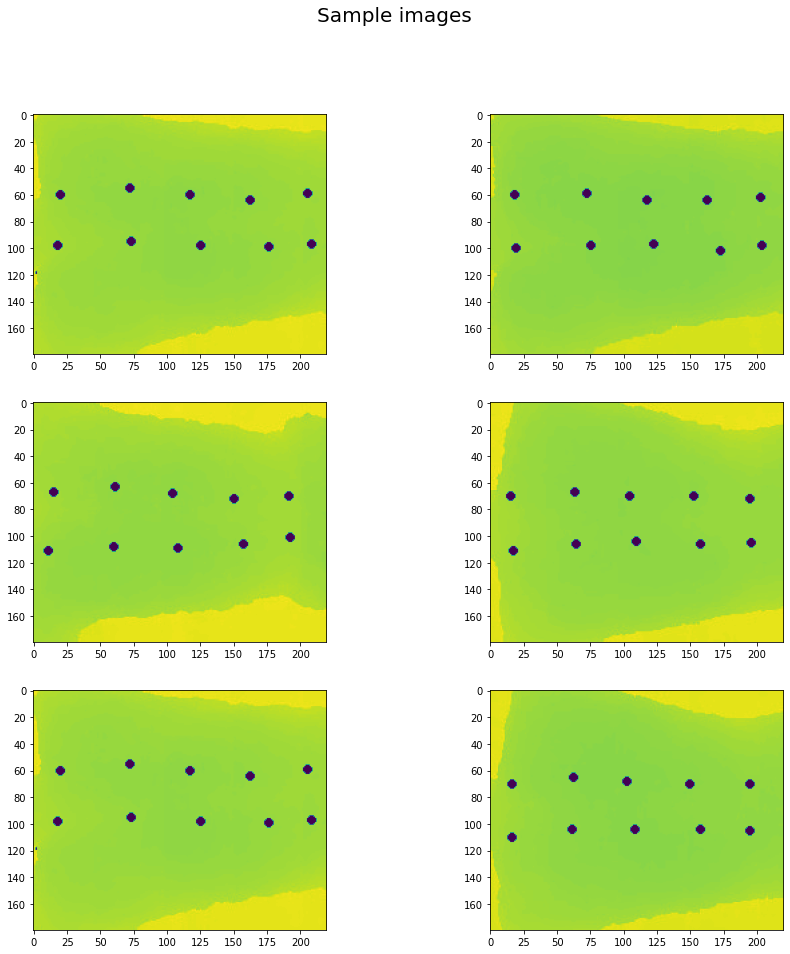

In [64]:
import matplotlib.pylab as plt
import cv2
pred = model.predict(x_test)
n = x_test.shape[0]
plt.figure(figsize = (15, 15))
plt.subplots_adjust(hspace = .2)
for i in range(6):
    plt.subplot(3, 2, i + 1)
    k = random.randint(0, n)
    img = x_test[k].reshape(height, width)
    points = pred[k, :]
    points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
    for x, y in points:
        cv2.circle(img, (int(x), int(y)), 2, (0, 0, 0), 2)
    plt.imshow(img)

_ = plt.suptitle('Sample images', size = 20)